In [1]:
#Add matplotlib inline magic command
%matplotlib inline

#dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

In [2]:
#convert ride and city data to df 
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#count all the rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
#double check for nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [6]:
#get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#get the number of datapoints for urban
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Suburban")

36

In [9]:
#get all columns count ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [41]:
#create a dataframe for Urban Data
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
urban_cities_df

0       Lake Jonathanshire
1       South Michelleport
2       Port Samanthamouth
3               Rodneyfort
4               South Jack
               ...        
1620          Reynoldsfurt
1621       Christopherfurt
1622          Raymondhaven
1623         Port Johnbury
1624          West Gabriel
Name: city, Length: 1625, dtype: object

In [43]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count


city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [15]:
#create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [16]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.max()

28.993749999999995

In [17]:
#get the average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
#get the average number of drivers for each city in the urban cities
urban_driver_count =  urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [19]:
#get the average fare for each city in the suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

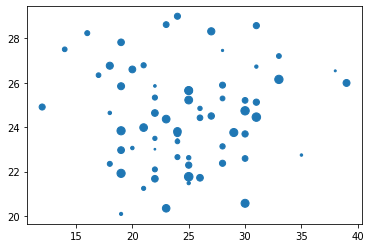

In [20]:
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count)

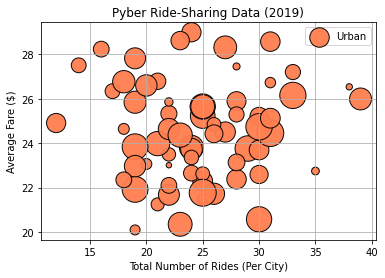

In [28]:
#scatter plot for urban
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

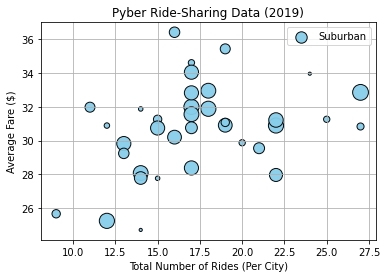

In [29]:
#scatter.suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

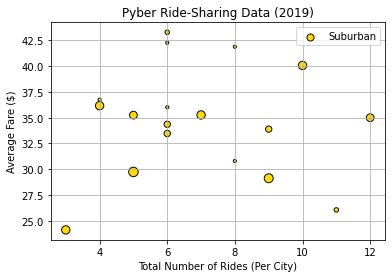

In [30]:
#scatter.rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

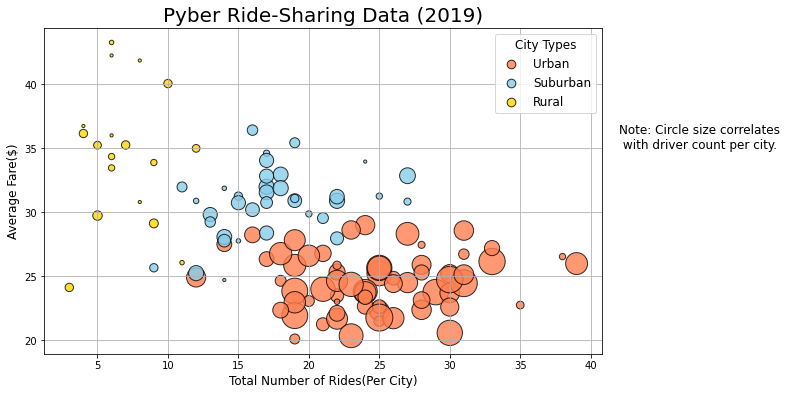

In [55]:
 #Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
#incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare($)", fontsize= 12)
plt.xlabel("Total Number of Rides(Per City)", fontsize = 12)
plt.grid(True)
#create a legend
lgnd = plt.legend(fontsize = "12", mode="Expanded", 
                  scatterpoints=1, loc = "best", title= "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Add the following text to encorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates \n with driver count per city.", fontsize="12")

#save the figure
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()